# Linear Regression
- In this section I will use linear regression techniques to predict the fuel efficiency, measured by miles per gallon (MPG) of vehicles based on various attributes in the Auto MPG
dataset.
- This analysis will help understand the influence of different vehicle characteristics
such as engine size, weight, and horsepower on fuel economy.
- The Auto MPG dataset describes city-cycle fuel consumption in MPG with several car attributes such as car weight, displacement, horsepower, etc. The Auto MPG dataset provided by seaborn.load dataset.

### Import Libraries

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


### Load & Split MPG Dataset

In [28]:
df = sns.load_dataset('mpg')

y = df['mpg']
X = df.drop(columns=['mpg'])

df = df.dropna(subset=['mpg'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)

In [30]:
df_full = sns.load_dataset('mpg')


df_full = df_full.dropna(subset=['mpg'])


data_train, data_test = train_test_split(df_full, test_size=0.2, random_state=231)

### Identify Categorical & Numerical Features

In [33]:
X_train, y_train = data_train.drop(columns=['mpg']), data_train['mpg']
X_test, y_test = data_test.drop(columns=['mpg']), data_test['mpg']
print(X_train.dtypes)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object
['origin', 'name']


In [35]:
print("Training set info:")
print(X_train.info())


numeric_cols = X_train.select_dtypes(include='number').columns


Training set info:
<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 219 to 87
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    312 non-null    float64
 3   weight        318 non-null    int64  
 4   acceleration  318 non-null    float64
 5   model_year    318 non-null    int64  
 6   origin        318 non-null    object 
 7   name          318 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 22.4+ KB
None


In [37]:
print(categorical_cols)
print(X_train.head)

['origin', 'name']
<bound method NDFrame.head of      cylinders  displacement  horsepower  weight  acceleration  model_year  \
219          4         122.0        96.0    2300          15.5          77   
157          8         350.0       145.0    4440          14.0          75   
242          4         121.0       110.0    2600          12.8          77   
287          8         351.0       138.0    3955          13.2          79   
230          8         350.0       170.0    4165          11.4          77   
..         ...           ...         ...     ...           ...         ...   
198          4          91.0        53.0    1795          17.4          76   
267          4         134.0        95.0    2560          14.2          78   
148          4         116.0        75.0    2246          14.0          74   
176          6         232.0        90.0    3211          17.0          75   
87           8         350.0       145.0    3988          13.0          73   

     origin   

### Feature Distributions Using Histograms and Pairplots

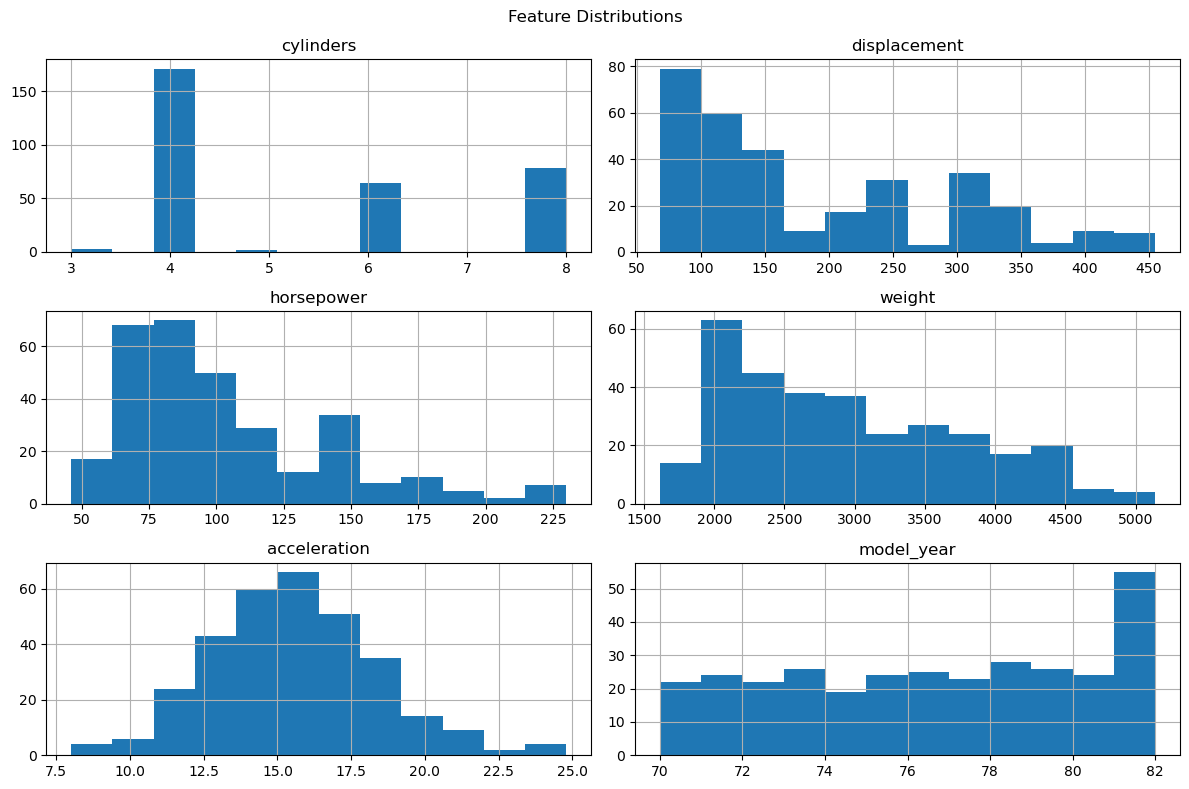

In [40]:
X_train[numeric_cols].hist(bins=12, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

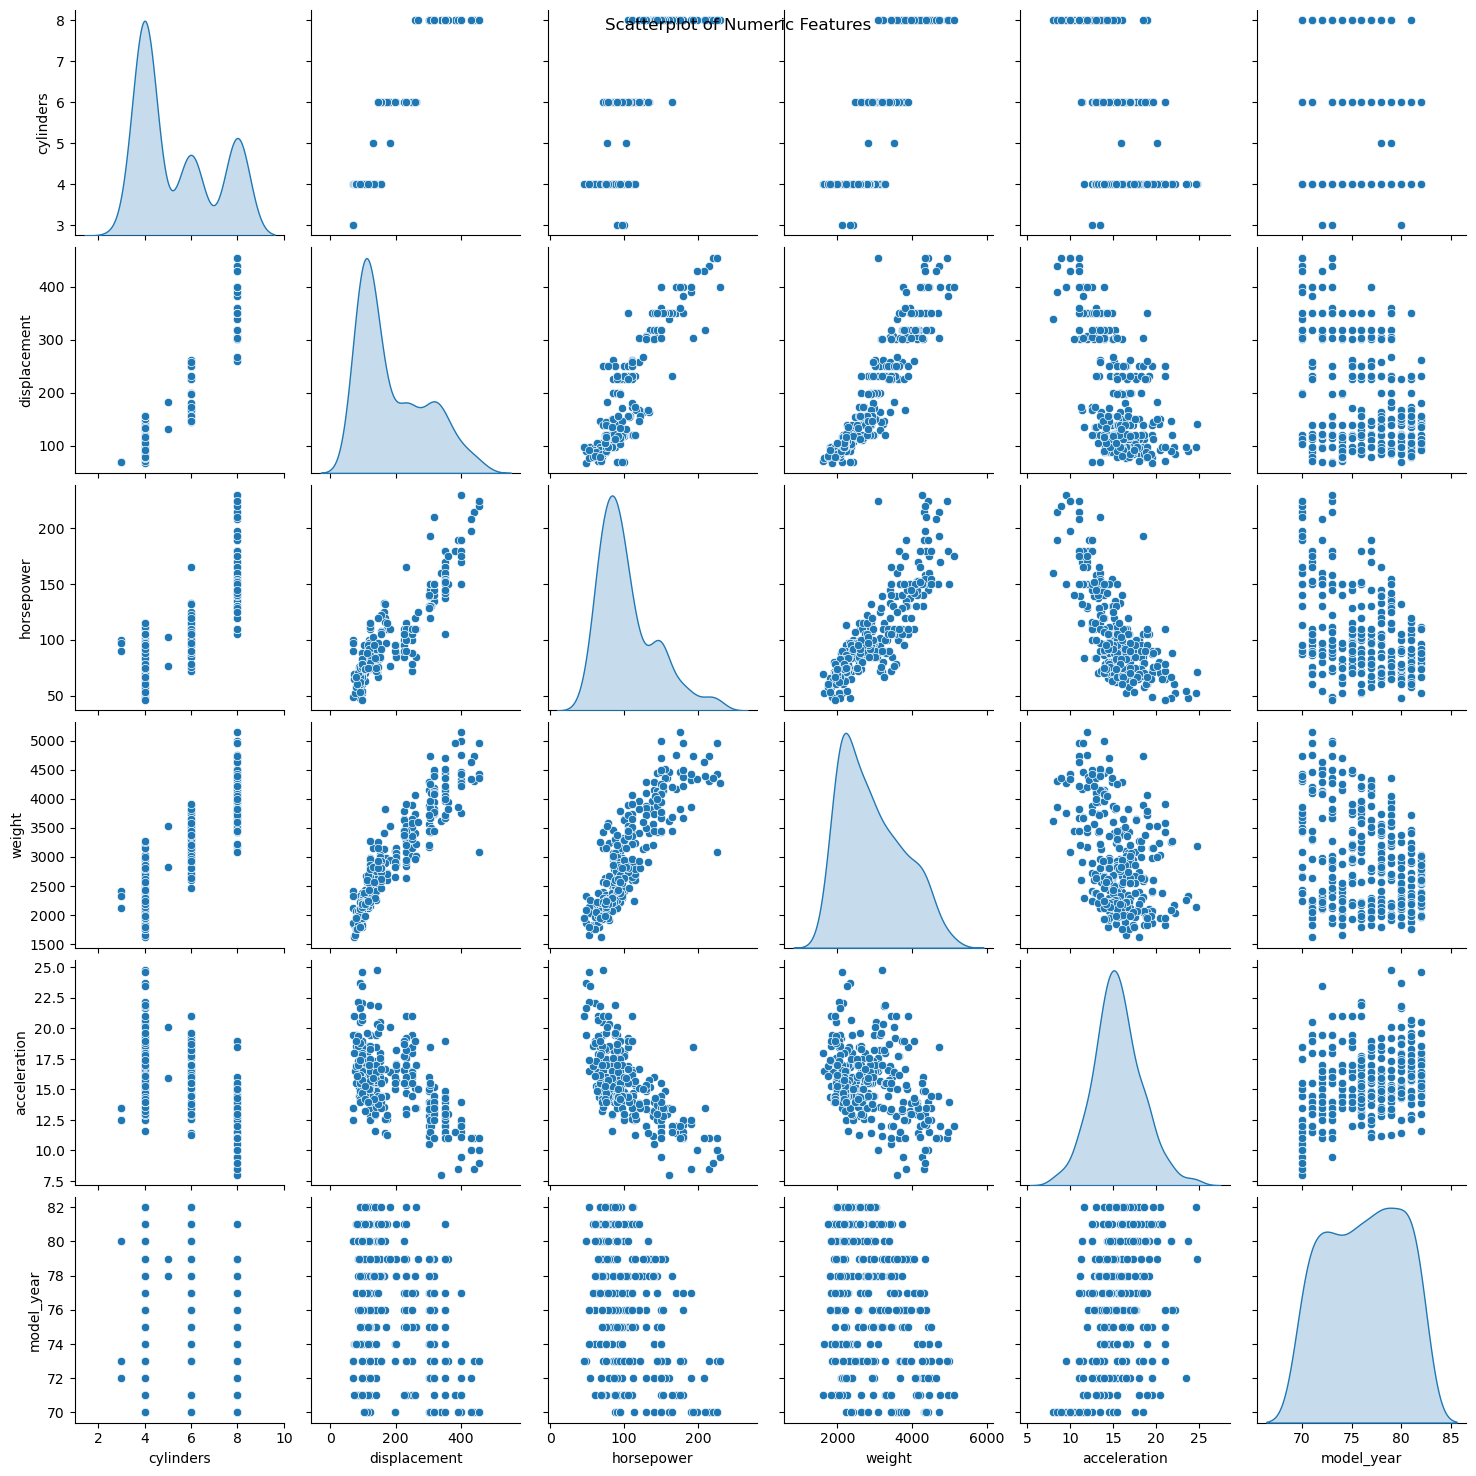

In [43]:
numeric_features = X_train.select_dtypes(include='number')
sns.pairplot(numeric_features, diag_kind='kde')
plt.suptitle('Scatterplot of Numeric Features')
plt.show()

### Handle Missing Values(Mean), Encode Categoricals(OneHotEncoder) & Scale Features(MinMaxScaler)

In [76]:
missing_counts = X_train.isnull().sum()
missing_percentage = (missing_counts / len(X_train)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})

missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
print("\nSummary of missing values in training set:")
print(missing_summary)


Summary of missing values in training set:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [78]:
imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])
from sklearn.preprocessing import OneHotEncoder

In [80]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(categorical_cols)

[]


In [93]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

train_idx = X_train.index
test_idx = X_test.index

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

columns = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=columns, index=train_idx)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=columns, index=test_idx)

X_train_num = X_train.drop(columns=categorical_cols)
X_test_num = X_test.drop(columns=categorical_cols)

X_train = pd.concat([X_train_num, X_train_encoded], axis=1)
X_test = pd.concat([X_test_num, X_test_encoded], axis=1)

display(X_train)
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,name_amc ambassador brougham,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
219,0.2,0.139535,0.271739,0.194783,0.446429,0.583333,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,1.0,0.728682,0.538043,0.801531,0.357143,0.416667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.2,0.136951,0.347826,0.279841,0.285714,0.583333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,1.0,0.731266,0.500000,0.664020,0.309524,0.750000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,1.0,0.728682,0.673913,0.723561,0.202381,0.583333,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.2,0.059432,0.038043,0.051602,0.559524,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.2,0.170543,0.266304,0.268500,0.369048,0.666667,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.2,0.124031,0.157609,0.179473,0.357143,0.333333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,0.6,0.423773,0.239130,0.453076,0.535714,0.416667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
print(X_train.shape, X_test.shape)
print(X_train_encoded.shape, X_test_encoded.shape)


(318, 264) (80, 264)
(318, 0) (80, 0)


### Train Linear Regression & Evaluate Performance

In [98]:
model = LinearRegression()
model.fit(X_train, y_train)


coefficient_df = pd.Series(model.coef_, index=X_train.columns)
print("\nModel Coefficients:")
print(coefficient_df)

# prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"\nTrain R^2: {train_r2:}, MSE: {train_mse:}")
print(f"Test  R^2: {test_r2:}, MSE: {test_mse:}")


Model Coefficients:
cylinders                   -3.541342e+00
displacement                -1.335013e+00
horsepower                  -4.048945e+00
weight                      -1.675227e+01
acceleration                -5.736809e+00
                                 ...     
name_vw dasher (diesel)     -1.538171e+12
name_vw pickup              -1.538171e+12
name_vw rabbit              -1.538171e+12
name_vw rabbit c (diesel)   -1.538171e+12
name_vw rabbit custom       -1.538171e+12
Length: 264, dtype: float64

Train R^2: 0.9814841506475227, MSE: 1.1049914518242359
Test  R^2: -4.217454017341263e+22, MSE: 2.7000665164862176e+24


# Clustering
- The clustering section uses K-Means on synthetic data generated with make_blobs, aiming to identify the optimal number of clusters by evaluating silhouette scores across different k values.
- The results show that k=3 yields the highest silhouette score (0.838), indicating well-separated clusters and confirming it as the best choice.


C:\Users\anwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Silhouette Score for k=2: 0.581
Silhouette Score for k=3: 0.838
Silhouette Score for k=4: 0.631
Silhouette Score for k=5: 0.407


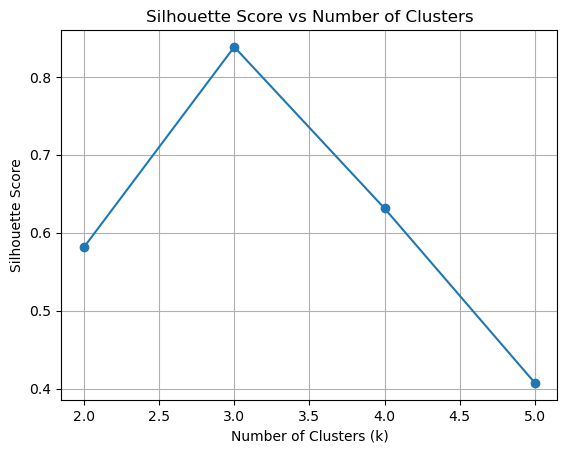

Best k: 3


In [111]:
X, y = make_blobs(n_samples=300, centers=3, n_features=4, random_state=231)

silhouette_scores = []
k_range = range(2, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=231)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

# best k
best_k = k_range[np.argmax(silhouette_scores)]
print(f"Best k: {best_k}")

C:\Users\anwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


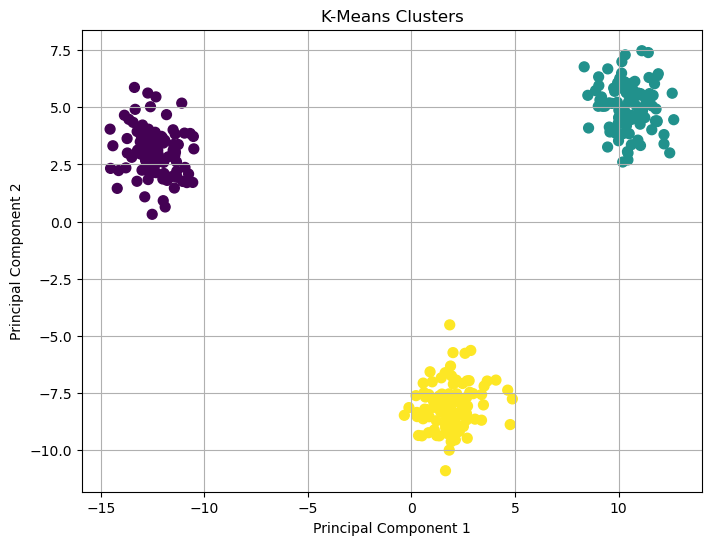

In [116]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=231)
y_kmeans = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title("K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

### Hierarchical Clustering Dendrogram

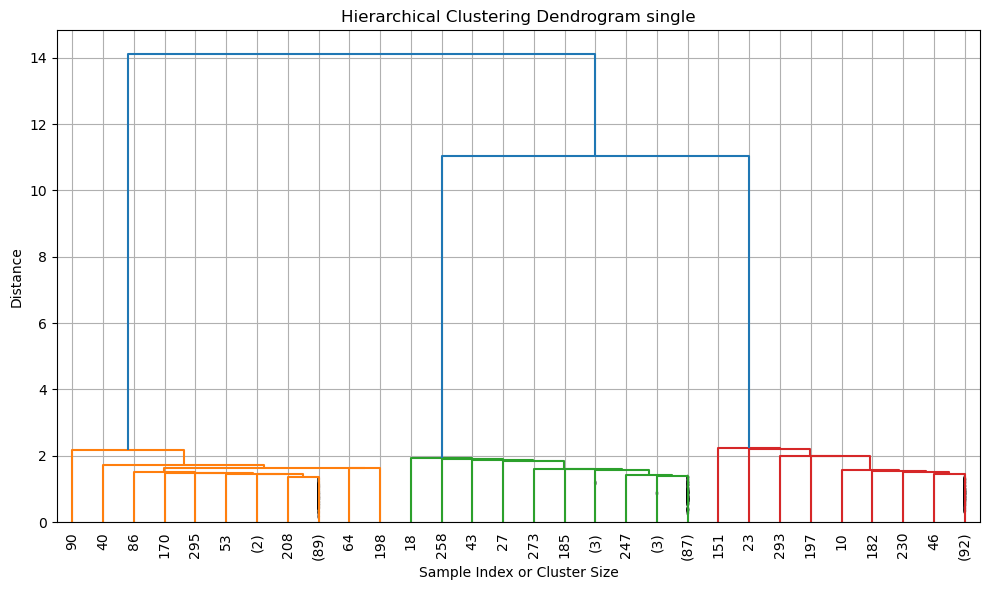

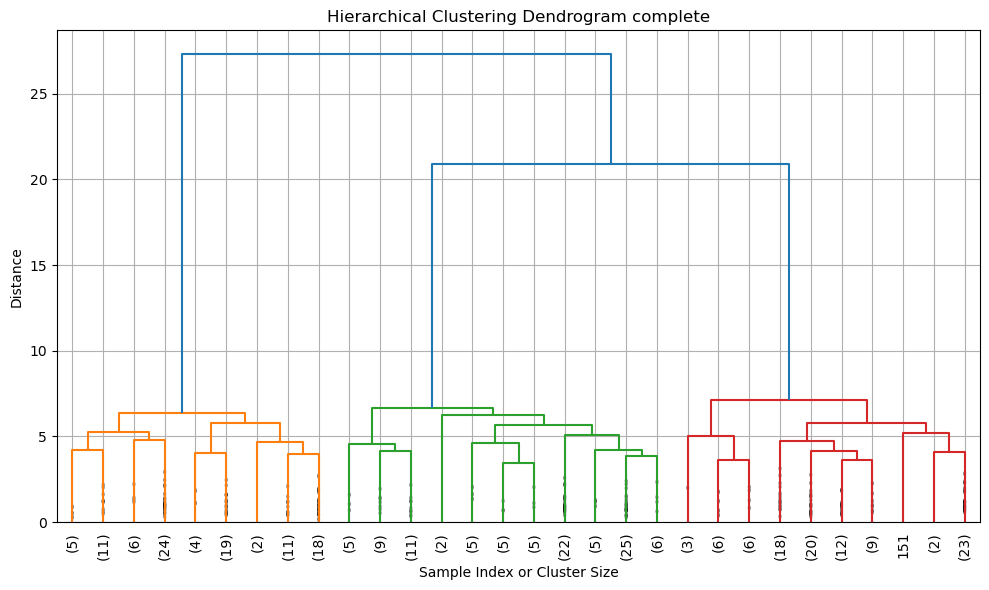

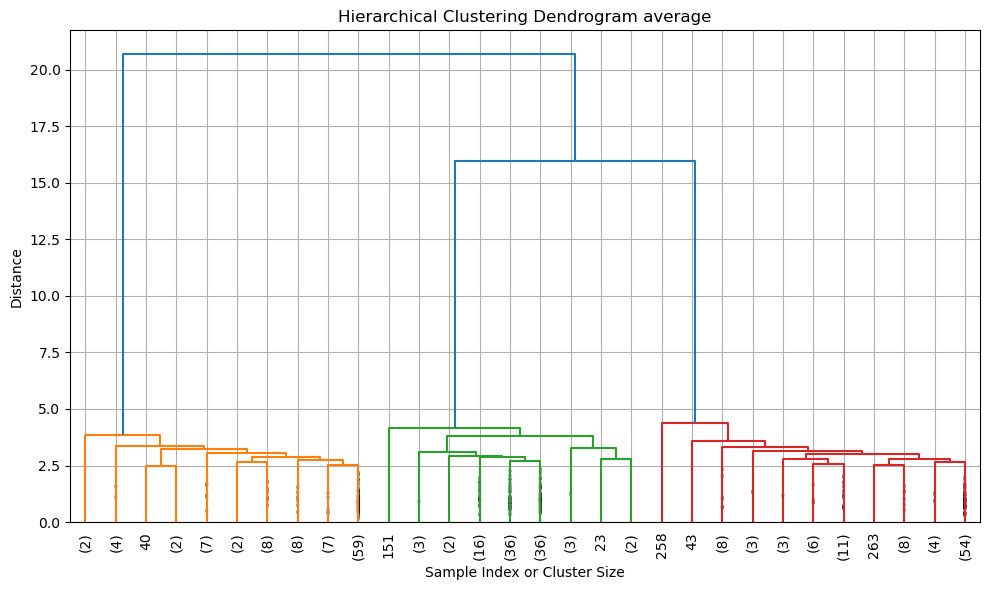

In [118]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_methods = ['single', 'complete', 'average']

for method in linkage_methods:
    linked = linkage(X, method=method)

    plt.figure(figsize=(10, 6))
    dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
    plt.title(f"Hierarchical Clustering Dendrogram {method}")
    plt.xlabel("Sample Index or Cluster Size")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()